In [14]:
import pandas as pd
import numpy as np

# Read CSV file into a DataFrame
df = pd.read_csv('supplier_dataset.csv')

# Shuffle the rows randomly
np.random.seed(42)  # for reproducibility
df = df.sample(frac=1).reset_index(drop=True)

# Write the shuffled rows back to the CSV file
df.to_csv('supplier_dataset.csv', index=False)


### Plot distribution by countries, products and month

In [15]:
df

,textile_type,qty_exported,countries_exported,type_of_product,per_unit_cost,total_price,year_of_export,month_of_export,customer_name,seller_name
0,cotton,191,United Kingdom,Skirt,99.77,19056.07,2021,Aug,Charles Howard,Michael Mcpherson MD
1,wool,332,Turkey,Scarf,60.96,20238.72,2022,Oct,Stephen Todd,Mr. Troy Fox MD
2,silk,326,Malaysia,Bags,8.39,2735.14,2022,Feb,Brianna Bishop,David Andrade
3,spandex,76,United States,Dress,33.65,2557.40,2020,Jul,Danny Pierce,Melissa Andersen
4,batik,291,India,Scarf,8.63,2511.33,2021,Nov,Katherine George,Laura Salas
...,...,...,...,...,...,...,...,...,...,...
9995,rayon,459,United Kingdom,Shawl,37.46,17194.14,2022,May,Anthony Fischer,Jack Pearson
9996,spandex,99,Hong Kong,Shirt,2.55,252.45,2020,Oct,Elizabeth Davis,Joseph Campbell
9997,silk,196,Bangladesh,Jacket,33.08,6483.68,2020,Sep,Alicia Lynch,Darlene Patton
9998,batik,77,Austria,Shirt,89.15,6864.55,2022,Mar,Lisa Ramirez,Denise Hobbs


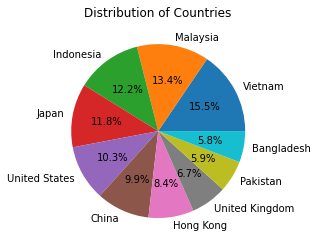

In [16]:
import matplotlib.pyplot as plt

# Count the number of exports by country and sort in descending order
type_of_pdt = df['countries_exported'].value_counts().sort_values(ascending=False)

# Select the top 10 countries with the highest number of exports
top_types = type_of_pdt[:10]

# Create a pie chart to visualize the distribution of exports by country
plt.pie(top_types, labels=top_types.index, autopct='%1.1f%%')
plt.title('Distribution of Countries')
plt.show()

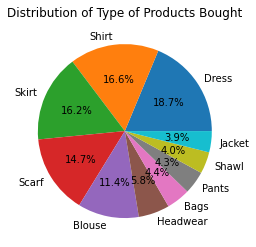

In [17]:

import matplotlib.pyplot as plt

# Count the number of exports by country and sort in descending order
type_of_pdt = df['type_of_product'].value_counts().sort_values(ascending=False)

# Select the top 10 countries with the highest number of exports
top_types = type_of_pdt[:10]

# Create a pie chart to visualize the distribution of exports by country
plt.pie(top_types, labels=top_types.index, autopct='%1.1f%%')
plt.title('Distribution of Type of Products Bought')
plt.show()

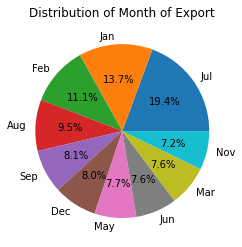

In [18]:
import matplotlib.pyplot as plt

# Count the number of exports by country and sort in descending order
type_of_pdt = df['month_of_export'].value_counts().sort_values(ascending=False)

# Select the top 10 countries with the highest number of exports
top_types = type_of_pdt[:10]

# Create a pie chart to visualize the distribution of exports by country
plt.pie(top_types, labels=top_types.index, autopct='%1.1f%%')
plt.title('Distribution of Month of Export')
plt.show()

### Predict the amount of demand (qty exported) I can expect during that period, based on month of exports and country

In [19]:

df = df.sample(frac=1, random_state=42)
df.columns

Index(['textile_type', 'qty_exported', 'countries_exported', 'type_of_product',
       'per_unit_cost', 'total_price', 'year_of_export', 'month_of_export',
       'customer_name', 'seller_name'],
      dtype='object')

In [20]:
X=df[['textile_type', 'month_of_export', 'countries_exported']]

y=df['type_of_product']

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np 

def preprocess_data(X):
    # if it is a numeric column - 
    # Normalize using MinMaxScaler to constrain values to between 0 and 1.

    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = X.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        #MinMaxScale needs [n_samples, n_features] and hence requires df[[col]]
        X[col] = scaler.fit_transform(X[[col]])
        
    print("---Successfully processed numeric column(s)")
    print(X.head(5))
    
    # if it is a categorical column, need to convert the column into one-hot encoding
    df_categorical = X.select_dtypes(exclude=[np.number])
    categorical_cols = df_categorical.columns.values

    X = pd.get_dummies(X,columns=categorical_cols)
           
    print("---Successfully processed categorical column(s)")
    print(X.head(5))
        
    return X,scaler

In [131]:
# y = np.array(y)

# from scipy.stats import skew

# # assume data is a 1D numpy array or a pandas Series
# skewness = skew(y)
# print('Skewness:', skewness)


In [37]:
X,scaler = preprocess_data(X)

---Successfully processed numeric column(s)
      textile_type_batik  textile_type_cotton  textile_type_flax  \
6252                 0.0                  0.0                0.0   
4684                 1.0                  0.0                0.0   
1731                 1.0                  0.0                0.0   
4742                 0.0                  0.0                1.0   
4521                 1.0                  0.0                0.0   

      textile_type_jute  textile_type_linen  textile_type_nylon  \
6252                0.0                 0.0                 0.0   
4684                0.0                 0.0                 0.0   
1731                0.0                 0.0                 0.0   
4742                0.0                 0.0                 0.0   
4521                0.0                 0.0                 0.0   

      textile_type_polyester  textile_type_rayon  textile_type_silk  \
6252                     1.0                 0.0                0.0   
46

In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate the model object
model = CatBoostClassifier(learning_rate=0.1, random_seed=5)

# Fit the model with the training data
model.fit(X_train, y_train)  # set verbose=False if you find the logs too long

# Predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)



0:	learn: 2.2710721	total: 7.09ms	remaining: 7.08s
1:	learn: 2.2447947	total: 13.1ms	remaining: 6.55s
2:	learn: 2.2233005	total: 18.3ms	remaining: 6.07s
3:	learn: 2.2058331	total: 22.8ms	remaining: 5.68s
4:	learn: 2.1913737	total: 25.9ms	remaining: 5.16s
5:	learn: 2.1789276	total: 30.3ms	remaining: 5.02s
6:	learn: 2.1686491	total: 34.6ms	remaining: 4.91s
7:	learn: 2.1595001	total: 38.4ms	remaining: 4.75s
8:	learn: 2.1518913	total: 42.1ms	remaining: 4.64s
9:	learn: 2.1449601	total: 45.6ms	remaining: 4.51s
10:	learn: 2.1392388	total: 49.3ms	remaining: 4.43s
11:	learn: 2.1348572	total: 52ms	remaining: 4.28s
12:	learn: 2.1312831	total: 54.3ms	remaining: 4.12s
13:	learn: 2.1273834	total: 57.4ms	remaining: 4.04s
14:	learn: 2.1238112	total: 60.7ms	remaining: 3.99s
15:	learn: 2.1207159	total: 64ms	remaining: 3.93s
16:	learn: 2.1178531	total: 67.3ms	remaining: 3.89s
17:	learn: 2.1151973	total: 70.8ms	remaining: 3.86s
18:	learn: 2.1132545	total: 74.1ms	remaining: 3.82s
19:	learn: 2.1115097	total

163:	learn: 2.0020455	total: 617ms	remaining: 3.14s
164:	learn: 2.0015192	total: 630ms	remaining: 3.19s
165:	learn: 2.0009797	total: 644ms	remaining: 3.23s
166:	learn: 2.0004215	total: 649ms	remaining: 3.24s
167:	learn: 1.9998472	total: 654ms	remaining: 3.24s
168:	learn: 1.9990818	total: 660ms	remaining: 3.24s
169:	learn: 1.9985780	total: 665ms	remaining: 3.25s
170:	learn: 1.9978331	total: 673ms	remaining: 3.26s
171:	learn: 1.9972976	total: 678ms	remaining: 3.26s
172:	learn: 1.9967995	total: 692ms	remaining: 3.31s
173:	learn: 1.9963217	total: 696ms	remaining: 3.3s
174:	learn: 1.9957495	total: 700ms	remaining: 3.3s
175:	learn: 1.9951000	total: 704ms	remaining: 3.3s
176:	learn: 1.9945117	total: 707ms	remaining: 3.29s
177:	learn: 1.9939985	total: 711ms	remaining: 3.28s
178:	learn: 1.9934542	total: 714ms	remaining: 3.27s
179:	learn: 1.9929815	total: 718ms	remaining: 3.27s
180:	learn: 1.9924872	total: 724ms	remaining: 3.28s
181:	learn: 1.9918799	total: 728ms	remaining: 3.27s
182:	learn: 1.9

341:	learn: 1.9176473	total: 1.4s	remaining: 2.69s
342:	learn: 1.9172242	total: 1.4s	remaining: 2.68s
343:	learn: 1.9169178	total: 1.41s	remaining: 2.68s
344:	learn: 1.9165490	total: 1.41s	remaining: 2.68s
345:	learn: 1.9161114	total: 1.41s	remaining: 2.67s
346:	learn: 1.9158034	total: 1.42s	remaining: 2.67s
347:	learn: 1.9154618	total: 1.42s	remaining: 2.67s
348:	learn: 1.9149048	total: 1.43s	remaining: 2.67s
349:	learn: 1.9146251	total: 1.43s	remaining: 2.66s
350:	learn: 1.9142325	total: 1.44s	remaining: 2.66s
351:	learn: 1.9138116	total: 1.44s	remaining: 2.65s
352:	learn: 1.9134766	total: 1.44s	remaining: 2.65s
353:	learn: 1.9131537	total: 1.45s	remaining: 2.64s
354:	learn: 1.9127658	total: 1.45s	remaining: 2.64s
355:	learn: 1.9123435	total: 1.46s	remaining: 2.63s
356:	learn: 1.9119861	total: 1.46s	remaining: 2.63s
357:	learn: 1.9115631	total: 1.46s	remaining: 2.63s
358:	learn: 1.9112248	total: 1.47s	remaining: 2.62s
359:	learn: 1.9108579	total: 1.47s	remaining: 2.62s
360:	learn: 1.

535:	learn: 1.8530979	total: 2.18s	remaining: 1.89s
536:	learn: 1.8528330	total: 2.18s	remaining: 1.88s
537:	learn: 1.8524299	total: 2.18s	remaining: 1.88s
538:	learn: 1.8521340	total: 2.19s	remaining: 1.87s
539:	learn: 1.8518878	total: 2.19s	remaining: 1.87s
540:	learn: 1.8515815	total: 2.19s	remaining: 1.86s
541:	learn: 1.8513405	total: 2.2s	remaining: 1.86s
542:	learn: 1.8510234	total: 2.2s	remaining: 1.85s
543:	learn: 1.8508276	total: 2.21s	remaining: 1.85s
544:	learn: 1.8504991	total: 2.21s	remaining: 1.85s
545:	learn: 1.8501310	total: 2.21s	remaining: 1.84s
546:	learn: 1.8498449	total: 2.22s	remaining: 1.84s
547:	learn: 1.8495940	total: 2.22s	remaining: 1.83s
548:	learn: 1.8493418	total: 2.23s	remaining: 1.83s
549:	learn: 1.8490035	total: 2.23s	remaining: 1.82s
550:	learn: 1.8487737	total: 2.23s	remaining: 1.82s
551:	learn: 1.8485691	total: 2.24s	remaining: 1.81s
552:	learn: 1.8482658	total: 2.24s	remaining: 1.81s
553:	learn: 1.8479393	total: 2.24s	remaining: 1.8s
554:	learn: 1.8

740:	learn: 1.8001002	total: 2.96s	remaining: 1.04s
741:	learn: 1.7998791	total: 2.97s	remaining: 1.03s
742:	learn: 1.7996750	total: 2.97s	remaining: 1.03s
743:	learn: 1.7994908	total: 2.98s	remaining: 1.02s
744:	learn: 1.7992250	total: 2.98s	remaining: 1.02s
745:	learn: 1.7989581	total: 2.98s	remaining: 1.01s
746:	learn: 1.7987216	total: 2.99s	remaining: 1.01s
747:	learn: 1.7984083	total: 2.99s	remaining: 1.01s
748:	learn: 1.7981671	total: 3s	remaining: 1s
749:	learn: 1.7979168	total: 3s	remaining: 1000ms
750:	learn: 1.7976092	total: 3s	remaining: 995ms
751:	learn: 1.7973881	total: 3s	remaining: 991ms
752:	learn: 1.7971295	total: 3.01s	remaining: 987ms
753:	learn: 1.7968630	total: 3.01s	remaining: 983ms
754:	learn: 1.7966115	total: 3.02s	remaining: 979ms
755:	learn: 1.7964512	total: 3.02s	remaining: 974ms
756:	learn: 1.7962464	total: 3.02s	remaining: 970ms
757:	learn: 1.7959489	total: 3.02s	remaining: 966ms
758:	learn: 1.7957330	total: 3.03s	remaining: 962ms
759:	learn: 1.7954965	tota

929:	learn: 1.7602880	total: 3.75s	remaining: 282ms
930:	learn: 1.7600776	total: 3.75s	remaining: 278ms
931:	learn: 1.7598811	total: 3.76s	remaining: 274ms
932:	learn: 1.7597049	total: 3.76s	remaining: 270ms
933:	learn: 1.7595299	total: 3.77s	remaining: 266ms
934:	learn: 1.7593816	total: 3.77s	remaining: 262ms
935:	learn: 1.7592392	total: 3.77s	remaining: 258ms
936:	learn: 1.7590395	total: 3.78s	remaining: 254ms
937:	learn: 1.7588555	total: 3.78s	remaining: 250ms
938:	learn: 1.7587008	total: 3.79s	remaining: 246ms
939:	learn: 1.7585620	total: 3.79s	remaining: 242ms
940:	learn: 1.7583792	total: 3.79s	remaining: 238ms
941:	learn: 1.7582144	total: 3.8s	remaining: 234ms
942:	learn: 1.7580661	total: 3.8s	remaining: 230ms
943:	learn: 1.7579352	total: 3.8s	remaining: 226ms
944:	learn: 1.7577733	total: 3.81s	remaining: 222ms
945:	learn: 1.7576055	total: 3.81s	remaining: 218ms
946:	learn: 1.7574075	total: 3.81s	remaining: 214ms
947:	learn: 1.7572399	total: 3.82s	remaining: 209ms
948:	learn: 1.7

In [41]:
# Split feature and label sets to train and data sets - 80-20, random_state is desirable for reproducibility
# stratify parameter is not relevant for regression since it is not about splitting via category/class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 43) (3000, 43) (7000,) (3000,)


In [45]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
#------------------------
model = LinearRegression()

# Train the model
#----------------
model.fit(X_train, y_train)

# Use model to make predictions
#------------------------------
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error

# Evaluation - using relevant metrics
#------------------------------------
# print("Model Features:", model.feature_names_in_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

In [47]:
from sklearn.metrics import r2_score

# Coefficient of Determination of the model
#------------------------------------------
print("Coefficient of Determination or r-squared:", r2_score(y_test, y_pred))